## Question 1

In [1]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt

# Extract datasets
categories = ['comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
              'rec.autos', 'rec.motorcycles','rec.sport.baseball', 'rec.sport.hockey']
dataset = fetch_20newsgroups(subset = 'all', categories = categories, shuffle = True, random_state = 42)

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer_count = CountVectorizer(min_df = 3, stop_words = 'english')
counts = vectorizer_count.fit_transform(dataset.data)

tfidf_transformer = TfidfTransformer()
tfidf = tfidf_transformer.fit_transform(counts)
print("The dimension of the TF-IDF matrix is", tfidf.shape, ".")

The dimension of the TF-IDF matrix is (7882, 27768) .


## Question 2

In [3]:
from sklearn.cluster import KMeans
from sklearn import metrics
import numpy as np
np.random.seed(42)
import random
random.seed(42)

k_m = KMeans(n_clusters = 2, random_state = 0, max_iter = 1000, n_init = 30, init = 'k-means++')
k_m.fit(tfidf)

# Find the most common terms per cluster
order = k_m.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer_count.get_feature_names()
_, idx = np.unique(dataset.target, return_index=True)
labels = np.zeros_like(dataset.target)
for y in [0,1,2,3]:
    labels[np.argwhere(dataset.target == y)] = 1
for y in [4,5,6,7]:
    labels[np.argwhere(dataset.target == y)] = 0
classname = ['Class 1', 'Class 2']

cont_mat = metrics.cluster.contingency_matrix(labels, k_m.labels_)

[[1727 2252]
 [   4 3899]]


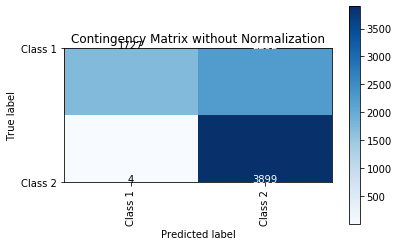

In [4]:
import itertools
def plot_cont_mat(cont_mat, name_class, normalize = False, title = 'Contingency Table', cmap = plt.cm.Blues):
    if normalize:
        cont_mat = cont_mat.astype('float') / cont_mat.sum()
    else:
        
        print(cont_mat)
    
    plt.imshow(cont_mat, interpolation='nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(name_class))
    plt.xticks(tick_marks, name_class, rotation = 90)
    plt.yticks(tick_marks, name_class)

    fmt = '.2f' if normalize else 'd'
    thresh = cont_mat.max() / 2.
    for i, j in itertools.product(range(cont_mat.shape[0]), range(cont_mat.shape[1])):
        plt.text(j, i, format(cont_mat[i, j], fmt),
                 horizontalalignment="center",
                 color = "white" if cont_mat[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()
        
plt.figure()
plot_cont_mat(cont_mat, name_class = classname, normalize = False,
                      title='Contingency Matrix without Normalization')

plt.show()